In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from pathlib import Path

In [2]:
# 1. NumPy Operations
def numpy_operations():
    """Demonstrate NumPy array operations and compare with loops"""
    print("\n=== NumPy Operations ===")
    
    # Create arrays
    arr1 = np.array([1, 2, 3, 4, 5])
    arr2 = np.array([6, 7, 8, 9, 10])
    
    # Elementwise operations
    print("Array addition:", arr1 + arr2)
    print("Array multiplication:", arr1 * arr2)
    print("Array exponentiation:", arr1 ** 2)
    
    # Performance comparison
    size = 1000000
    a = np.random.rand(size)
    b = np.random.rand(size)
    
    # Vectorized operation
    start = time.time()
    c = a * b
    vectorized_time = time.time() - start
    
    # Loop operation
    start = time.time()
    c_loop = np.zeros(size)
    for i in range(size):
        c_loop[i] = a[i] * b[i]
    loop_time = time.time() - start
    
    print(f"\nVectorized operation took: {vectorized_time:.6f} seconds")
    print(f"Loop operation took: {loop_time:.6f} seconds")
    print(f"Vectorized operation was {loop_time/vectorized_time:.1f}x faster")

In [3]:
# 2. Dataset Loading
def load_and_inspect_data(filepath="../data/starter_data.csv"):
    """Load and inspect the dataset"""
    print("\n=== Dataset Loading ===")
    
    # Create directories if they don't exist
    Path("data/processed").mkdir(parents=True, exist_ok=True)
    
    # Load data
    try:
        df = pd.read_csv(filepath)
        
        # Try to parse dates automatically
        df = df.apply(lambda col: pd.to_datetime(col, errors='ignore') 
                      if col.dtype == object else col)
        
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        # Create empty DataFrame with expected structure for demonstration
        df = pd.DataFrame({
            'numeric_col': [1, 2, 3],
            'category': ['A', 'B', 'A'],
            'date_col': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03'])
        })
        print("Using sample data for demonstration")
    
    # Inspect data
    print("\nData Info:")
    print(df.info())
    
    print("\nFirst 5 rows:")
    print(df.head())
    
    return df

In [4]:
# 3. Summary Statistics
def calculate_summary_stats(df):
    """Calculate summary statistics for numeric columns only"""
    print("\n=== Summary Statistics ===")
    
    # Basic statistics for numeric columns only
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print("\nNumeric columns found:", list(numeric_cols))
    
    if len(numeric_cols) > 0:
        print("\nDescriptive statistics for numeric columns:")
        desc_stats = df[numeric_cols].describe()
        print(desc_stats)
    else:
        print("\nNo numeric columns found for descriptive statistics")
        desc_stats = None
    
    # Groupby operations for numeric columns (if category column exists)
    group_stats = None
    if 'category' in df.columns:
        print("\nGroupby statistics:")
        # Only include numeric columns in groupby
        group_cols = [c for c in numeric_cols if c != 'category']
        if group_cols:
            group_stats = df.groupby('category')[group_cols].agg(['mean', 'median', 'std'])
            print(group_stats)
        else:
            print("No numeric columns available for groupby operations")
    else:
        print("\nNo 'category' column found for groupby operations")
    
    return desc_stats, group_stats


In [5]:
# 4. Save Outputs
def save_outputs(desc_stats, group_stats, df):
    """Save outputs to files"""
    print("\n=== Saving Outputs ===")
    
    # Save descriptive statistics if available
    if desc_stats is not None:
        desc_stats.to_csv("../data/processed/summary.csv")
        desc_stats.to_json("../data/processed/summary.json")
        print("Saved summary statistics to CSV and JSON")
        
        # Bonus: Create and save a basic plot
        plt.figure(figsize=(8, 4))
        df.groupby('category')['value'].mean().plot(kind='bar', color='skyblue')
        plt.title("Average Value by Category")
        plt.savefig("../data/processed/basic_plot.png")
        print("Saved basic plot to data/processed/basic_plot.png")
    else:
        print("No descriptive statistics to save")
    
    # Save group statistics if available
    if group_stats is not None:
        group_stats.to_csv("../data/processed/group_summary.csv")
        group_stats.to_json("../data/processed/group_summary.json")
        print("Saved group statistics to CSV and JSON")

In [6]:
# 5. Reusable Functions
def get_summary_stats(df, groupby_col=None):
    """
    Utility function to get summary statistics for numeric columns only
    Args:
        df: pandas DataFrame
        groupby_col: column name to group by (optional)
    Returns:
        Dictionary containing summary statistics
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    stats = {
        'description': df[numeric_cols].describe() if len(numeric_cols) > 0 else None,
        'dtypes': df.dtypes,
        'null_counts': df.isnull().sum(),
        'numeric_columns': list(numeric_cols)
    }
    
    if groupby_col and groupby_col in df.columns and len(numeric_cols) > 0:
        group_cols = [c for c in numeric_cols if c != groupby_col]
        if group_cols:
            stats['group_stats'] = df.groupby(groupby_col)[group_cols].agg(['mean', 'median', 'std'])
    
    return stats


=== NumPy Operations ===
Array addition: [ 7  9 11 13 15]
Array multiplication: [ 6 14 24 36 50]
Array exponentiation: [ 1  4  9 16 25]

Vectorized operation took: 0.007822 seconds
Loop operation took: 0.302536 seconds
Vectorized operation was 38.7x faster

=== Dataset Loading ===

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   category  10 non-null     object        
 1   value     10 non-null     int64         
 2   date      10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 368.0+ bytes
None

First 5 rows:
  category  value       date
0        A     10 2025-08-01
1        B     15 2025-08-02
2        A     12 2025-08-03
3        B     18 2025-08-04
4        C     25 2025-08-05

=== Summary Statistics ===

Numeric columns found: ['value']

Descriptive statistics for numeric columns:

/var/folders/_4/t03mdfy94ts0ylt8cw0q1bp00000gn/T/ipykernel_84057/3902794110.py:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df = df.apply(lambda col: pd.to_datetime(col, errors='ignore')
/var/folders/_4/t03mdfy94ts0ylt8cw0q1bp00000gn/T/ipykernel_84057/3902794110.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = df.apply(lambda col: pd.to_datetime(col, errors='ignore')
/var/folders/_4/t03mdfy94ts0ylt8cw0q1bp00000gn/T/ipykernel_84057/3902794110.py:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df = df.apply(lambda col: pd.to_datetime(col, errors='ignore')


Saved basic plot to data/processed/basic_plot.png
Saved group statistics to CSV and JSON

=== Reusable Function Demo ===

Summary from reusable function:
           value
count  10.000000
mean   17.600000
std     7.381659
min    10.000000
25%    12.250000
50%    14.500000
75%    23.250000
max    30.000000


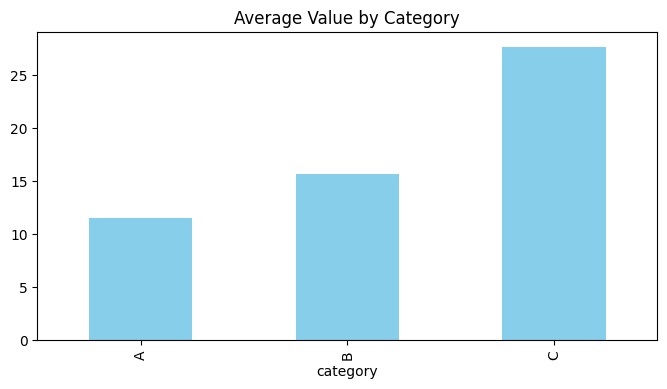

In [7]:
def main():
    # Execute all steps
    numpy_operations()
    
    df = load_and_inspect_data()
    
    desc_stats, group_stats = calculate_summary_stats(df)
    
    save_outputs(desc_stats, group_stats, df)
    
    # Demonstrate reusable function
    print("\n=== Reusable Function Demo ===")
    summary = get_summary_stats(df, 'category' if 'category' in df.columns else None)
    print("\nSummary from reusable function:")
    if summary['description'] is not None:
        print(summary['description'])
    else:
        print("No numeric columns available for description")

if __name__ == "__main__":
    main()